# Matched

In [35]:
import pandas as pd
import utils
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\jon\\Desktop\\EPFL\\MA1\\ADA\\pro_med\\ada-2024-project-mediterranean\\src\\data\\utils.py'>

## Files loadings

In [36]:
beers_rate = pd.read_csv("../../data/Processed/RateBeer/beers_processed.csv", sep=",")
breweries_rate = pd.read_csv("../../data/Processed/RateBeer/breweries_processed.csv", sep=",")
users_rate = pd.read_csv("../../data/Processed/RateBeer/users_processed.csv", sep=",")

beers_adv = pd.read_csv("../../data/Processed/BeerAdvocate/beers_processed.csv", sep=",")
breweries_adv = pd.read_csv("../../data/Processed/BeerAdvocate/breweries_processed.csv", sep=",")
users_adv = pd.read_csv("../../data/Processed/BeerAdvocate/users_processed.csv", sep=",")

C:\Users\jon\AppData\Local\Temp\ipykernel_1128\2600583422.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  beers_rate = pd.read_csv("../../data/Processed/RateBeer/beers_processed.csv", sep=",")


# Beers

In [37]:
utils.dataset_information(beers_adv, "BeersADV")



########################################################
We are starting analysing dataset BeersADV
- Dimension of starting dataset: (202137, 20)
- Columns of dataset:  Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'nbr_reviews', 'avg', 'ba_score', 'bros_score', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings', 'location', 'location_region', 'US', 'UK',
       'Canada'],
      dtype='object')
- Are all the id unique? Answer: False
- Are there some values that are NaN inside the dataset? Answer: True
Head: 
    beer_id           beer_name  brewery_id  \
0   142544               Régab       37262   
1    19590       Barelegs Brew       10093   
2    19827            Legbiter       10093   
3    20841   St. Patrick's Ale       10093   
4    20842  St. Patrick's Best       10093   

                                brewery_name             style  nbr_ratings  \
0  Societe des Brasseries du

In [38]:
utils.dataset_information(beers_rate, "BeersRB")



########################################################
We are starting analysing dataset BeersRB
- Dimension of starting dataset: (397044, 19)
- Columns of dataset:  Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'overall_score', 'style_score', 'avg', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings', 'location', 'location_region', 'US', 'UK',
       'Canada'],
      dtype='object')
- Are all the id unique? Answer: False
- Are there some values that are NaN inside the dataset? Answer: True
Head: 
    beer_id               beer_name  brewery_id      brewery_name  \
0   410549       33 Export (Gabon)        3198           Sobraga   
1   105273     Castel Beer (Gabon)        3198           Sobraga   
2    19445                   Régab        3198           Sobraga   
3   155699  Ards Bally Black Stout       13538  Ards Brewing Co.   
4   239097        Ards Belfast 366       13538  Ards B

`beers_adv` has an extra column `nbr_reviews` that is not present in the `beer_rate` dataset:

In [39]:
beers_adv = beers_adv.drop(columns=['nbr_reviews'], errors='ignore')

Now let's keep only relevant columns and ensure same names:

In [40]:
beers_adv.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,location,location_region,US,UK,Canada
0,142544,Régab,37262,Societe des Brasseries du Gabon (SOBRAGA),Euro Pale Lager,1,2.88,NaN,NaN,4.5,2.880000,NaN,0,NaN,Gabon,NaN,False,False,False
1,19590,Barelegs Brew,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,4,3.85,NaN,NaN,4.5,3.845000,NaN,0,NaN,Northern Ireland,NaN,False,False,False
2,19827,Legbiter,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,75,3.45,80.0,80.0,4.8,3.439867,-0.649167,59,3.504068,Northern Ireland,NaN,False,False,False
3,20841,St. Patrick's Ale,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,8,3.86,NaN,NaN,6.0,3.888750,0.093110,6,3.768333,Northern Ireland,NaN,False,False,False
4,20842,St. Patrick's Best,10093,Strangford Lough Brewing Company Ltd,English Bitter,64,3.56,82.0,90.0,4.2,3.556094,-0.478579,48,3.580417,Northern Ireland,NaN,False,False,False


In [41]:
beers_rate.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,location,location_region,US,UK,Canada
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,NaN,NaN,2.72,5.0,2.000000,NaN,0,NaN,Gabon,NaN,False,False,False
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,5.0,58.0,2.18,5.2,1.910000,NaN,0,NaN,Gabon,NaN,False,False,False
2,19445,Régab,3198,Sobraga,Pale Lager,27,1.0,22.0,1.83,4.5,1.811111,NaN,0,NaN,Gabon,NaN,False,False,False
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,NaN,NaN,3.18,4.6,3.866667,0.823699,6,3.866667,Northern Ireland,NaN,False,False,False
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,NaN,NaN,2.79,4.2,3.000000,NaN,0,NaN,Northern Ireland,NaN,False,False,False


In [42]:
cols_retain = ['beer_id', 'beer_name','brewery_id','brewery_name','style','nbr_ratings','avg','abv','zscore','location','location_region','US','UK','Canada']
beers_rate_filt = beers_rate[cols_retain]
beers_adv_filt = beers_adv[cols_retain]

Let's make sure if there is continuity in `beer_id`, `brewery_id`  across both datasets.

In [43]:
beers_adv_filt = beers_adv_filt[beers_rate_filt.columns] # same column order

merged_beers = pd.merge(
    beers_rate_filt[['beer_name', 'beer_id']], 
    beers_adv_filt[['beer_name', 'beer_id']], 
    on='beer_name', 
    suffixes=('_rate', '_adv'),
    how='inner'
)

non_matching_ids = merged_beers[merged_beers['beer_id_rate'] != merged_beers['beer_id_adv']]
matching_ids = merged_beers[merged_beers['beer_id_rate'] == merged_beers['beer_id_adv']]

print(f"Total matching 'beer_id' entries: {len(matching_ids)}")
print(f"Total non-matching 'beer_id' entries: {len(non_matching_ids)}")

if not non_matching_ids.empty:
    print("\nCases where 'beer_id' does not match for the same 'beer_name':")
    print(non_matching_ids[['beer_name', 'beer_id_rate', 'beer_id_adv']])
else:
    print("\nAll 'beer_name' entries have matching 'beer_id' in both datasets.")

Total matching 'beer_id' entries: 0
Total non-matching 'beer_id' entries: 16618

Cases where 'beer_id' does not match for the same 'beer_name':
                       beer_name  beer_id_rate  beer_id_adv
0                          Régab         19445       142544
1                     Hilden Ale         11381        14893
2                    Hilden Halt         55659        34038
3                 Brown Bear IPA        467037       224632
4             The Foxes Rock IPA        376679       218951
...                          ...           ...          ...
16613              Chang Draught         85805        57199
16614                Chang Light         59056        66372
16615  Triple Pearl Weisse Pearl        458201       266853
16616                      Stela         15329        36813
16617              Stela Pils 4%        287791       183268

[16618 rows x 3 columns]


In [44]:
beers_adv_filt = pd.merge(
    beers_adv_filt.drop(columns=['beer_id']), 
    beers_rate_filt[['beer_name', 'beer_id']], 
    on='beer_name', 
    how='left'
)

beers_adv_filt = beers_adv_filt[beers_rate_filt.columns] # same column order

merged_beers = pd.merge(
    beers_rate_filt[['beer_name', 'beer_id']], 
    beers_adv_filt[['beer_name', 'beer_id']], 
    on='beer_name', 
    suffixes=('_rate', '_adv'),
    how='inner'
)

non_matching_ids = merged_beers[merged_beers['beer_id_rate'] != merged_beers['beer_id_adv']]
matching_ids = merged_beers[merged_beers['beer_id_rate'] == merged_beers['beer_id_adv']]

print(f"Total matching 'beer_id' entries: {len(matching_ids)}")
print(f"Total non-matching 'beer_id' entries: {len(non_matching_ids)}")

if not non_matching_ids.empty:
    print("\nCases where 'beer_id' does not match for the same 'beer_name':")
    print(non_matching_ids[['beer_name', 'beer_id_rate', 'beer_id_adv']])
else:
    print("\nAll 'beer_name' entries have matching 'beer_id' in both datasets.")

Total matching 'beer_id' entries: 16656
Total non-matching 'beer_id' entries: 92

Cases where 'beer_id' does not match for the same 'beer_name':
                    beer_name  beer_id_rate  beer_id_adv
139    Tipping Point Pale Ale        427856     279118.0
401             Rebellion IPA        304975      14258.0
403             Rebellion IPA        304975      14258.0
647             Dogwood Stout        321913        639.0
831            Black Swan IPA        307385     159908.0
...                       ...           ...          ...
16646                 Dia Sin        413077      33388.0
16647                 Dia Sin        413077     352242.0
16711            Castle Lager        137821       4497.0
16713            Castle Lager        137821       4497.0
16718       Carlsberg Classic        109399     532302.0

[92 rows x 3 columns]


In [45]:
print("Duplicates in beers_rate_filt:")
print(beers_rate_filt[beers_rate_filt['beer_name'].duplicated(keep=False)])

Duplicates in beers_rate_filt:
        beer_id                               beer_name  brewery_id  \
128      299465  Hercules BPA (Belfast Pale Ale) (cask)       19638   
129      299465  Hercules BPA (Belfast Pale Ale) (cask)       19638   
130      314964                      Hercules BPA (Keg)       19638   
131      314964                      Hercules BPA (Keg)       19638   
132      376837                  Hercules Christmas BPA       19638   
...         ...                                     ...         ...   
393480   181219                              Rio Grande        1965   
396559   137821                            Castle Lager        2424   
396571   109399                       Carlsberg Classic        4358   
396761   529206                       Hercules Pale Ale       31956   
396762   529206                       Hercules Pale Ale       31956   

                           brewery_name                 style  nbr_ratings  \
128                            Hercule

In [46]:
print("\nDuplicates in beers_adv_filt:")
print(beers_adv_filt[beers_adv_filt['beer_name'].duplicated(keep=False)])


Duplicates in beers_adv_filt:
         beer_id       beer_name  brewery_id  \
7       286713.0           Stout         297   
9            NaN             300        3415   
13           NaN   Belfast Black        3415   
16           NaN  Copperhead Ale        3415   
24           NaN       Nut Brown        3415   
...          ...             ...         ...   
202188       NaN        Serenity       23640   
202191       NaN       Cream Ale         885   
202193       NaN             IPA         885   
202195       NaN      Kölsch Ale         885   
202196       NaN   Nut Brown Ale         885   

                               brewery_name                         style  \
7                Thomas Caffrey Brewing Co.                American Stout   
9                     Whitewater Brewing Co              English Pale Ale   
13                    Whitewater Brewing Co               Irish Dry Stout   
16                    Whitewater Brewing Co              English Pale Ale   
24     

There are NaN issues that were not resolved:

In [47]:
beers_rate_filt = beers_rate_filt.dropna(how='any').reset_index(drop=True)
beers_adv_filt = beers_adv_filt.dropna(how='any').reset_index(drop=True)

print(beers_adv_filt.shape)
print(beers_rate_filt.shape)

(1132, 14)
(27709, 14)


In [48]:
merged_beers = pd.merge(
    beers_rate_filt[['beer_name', 'beer_id']], 
    beers_adv_filt[['beer_name', 'beer_id']], 
    on='beer_name', 
    suffixes=('_rate', '_adv'),
    how='inner'
)

non_matching_ids = merged_beers[merged_beers['beer_id_rate'] != merged_beers['beer_id_adv']]
matching_ids = merged_beers[merged_beers['beer_id_rate'] == merged_beers['beer_id_adv']]

print(f"Total matching 'beer_id' entries: {len(matching_ids)}")
print(f"Total non-matching 'beer_id' entries: {len(non_matching_ids)}")

if not non_matching_ids.empty:
    print("\nCases where 'beer_id' does not match for the same 'beer_name':")
    print(non_matching_ids[['beer_name', 'beer_id_rate', 'beer_id_adv']])
else:
    print("\nAll 'beer_name' entries have matching 'beer_id' in both datasets.")

Total matching 'beer_id' entries: 972
Total non-matching 'beer_id' entries: 0

All 'beer_name' entries have matching 'beer_id' in both datasets.


Now lets focuse on the `avg` column:

In [49]:
beers_adv_filt['avg'].describe()

count    1132.000000
mean        3.683693
std         0.435210
min         1.000000
25%         3.500000
50%         3.755000
75%         3.960000
max         4.810000
Name: avg, dtype: float64

In [50]:
beers_rate_filt['avg'].describe()

count    27709.000000
mean         3.153144
std          0.255786
min          0.000000
25%          3.000000
50%          3.130000
75%          3.300000
max          4.410000
Name: avg, dtype: float64

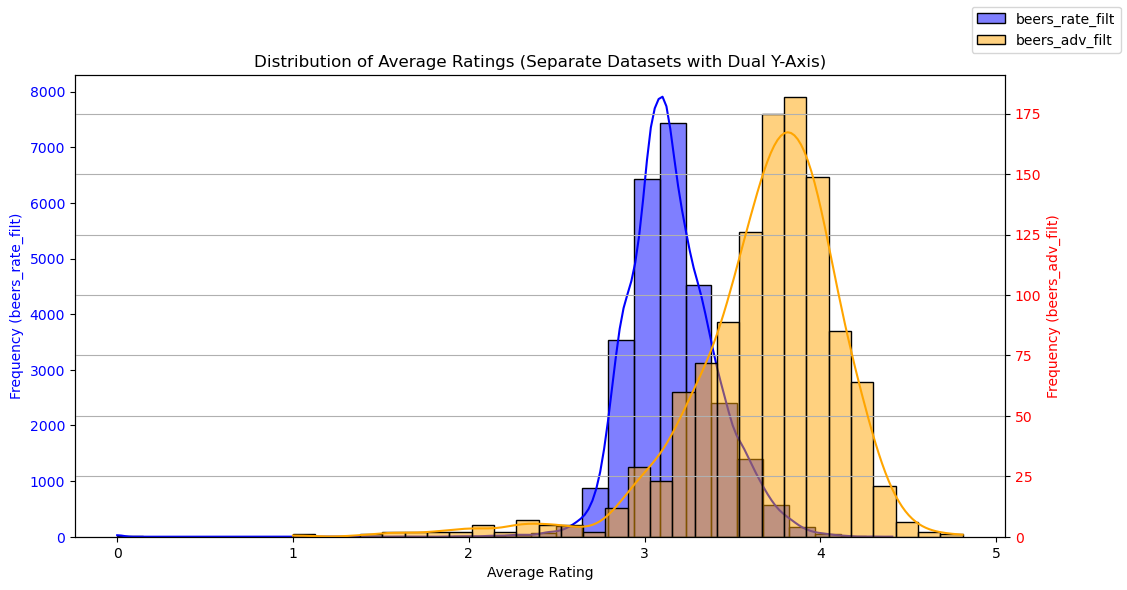

In [51]:
fig, ax1 = plt.subplots(figsize=(12, 6))
    
sns.histplot(beers_rate_filt['avg'], bins=30, kde=True, color='blue', alpha=0.5, ax=ax1, label='beers_rate_filt')
ax1.set_xlabel('Average Rating')
ax1.set_ylabel('Frequency (beers_rate_filt)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
    
ax2 = ax1.twinx()
sns.histplot(beers_adv_filt['avg'], bins=30, kde=True, color='orange', alpha=0.5, ax=ax2, label='beers_adv_filt')
ax2.set_ylabel('Frequency (beers_adv_filt)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
    
plt.title('Distribution of Average Ratings (Separate Datasets with Dual Y-Axis)')
fig.legend(loc='upper right')
plt.grid(True)
plt.show()

In [52]:
from scipy.stats import shapiro

stat1, p_value1 = shapiro(beers_rate_filt['avg'].dropna())
stat2, p_value2 = shapiro(beers_adv_filt['avg'].dropna())

print(f"Shapiro-Wilk Test for beers_rate_filt 'avg': p-value = {p_value1}")
print(f"Shapiro-Wilk Test for beers_adv_filt 'avg': p-value = {p_value2}")

Shapiro-Wilk Test for beers_rate_filt 'avg': p-value = 2.5769237287937956e-72
Shapiro-Wilk Test for beers_adv_filt 'avg': p-value = 2.3672107426335868e-26


c:\Users\jon\anaconda3\envs\ada\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 27709.
  res = hypotest_fun_out(*samples, **kwds)


Both can be assumed as normally distributed, so lets normalize both variables to ensure continuity:

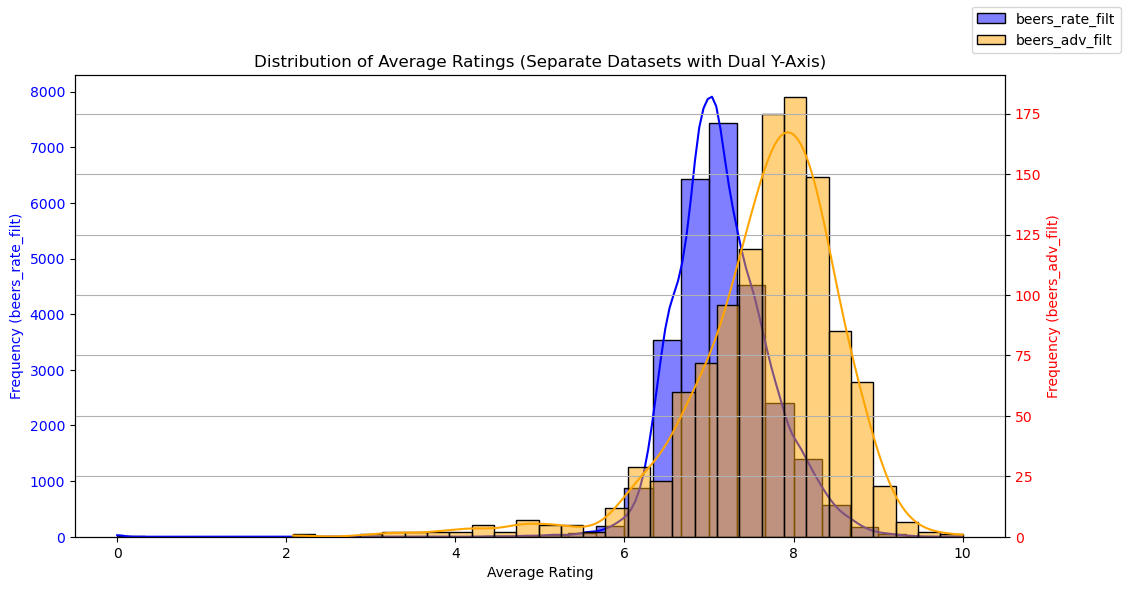

In [53]:
beers_rate_filt['avg'] = 10*beers_rate_filt['avg']/ beers_rate_filt['avg'].max()
beers_adv_filt['avg'] = 10*beers_adv_filt['avg']/ beers_adv_filt['avg'].max()

fig, ax1 = plt.subplots(figsize=(12, 6))
    
sns.histplot(beers_rate_filt['avg'], bins=30, kde=True, color='blue', alpha=0.5, ax=ax1, label='beers_rate_filt')
ax1.set_xlabel('Average Rating')
ax1.set_ylabel('Frequency (beers_rate_filt)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
    
ax2 = ax1.twinx()
sns.histplot(beers_adv_filt['avg'], bins=30, kde=True, color='orange', alpha=0.5, ax=ax2, label='beers_adv_filt')
ax2.set_ylabel('Frequency (beers_adv_filt)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
    
plt.title('Distribution of Average Ratings (Separate Datasets with Dual Y-Axis)')
fig.legend(loc='upper right')
plt.grid(True)
plt.show()

Final combination of datasets:

In [54]:
combined_beers = pd.concat([beers_rate_filt, beers_adv_filt], ignore_index=True)

In [55]:
utils.dataset_information(combined_beers, "Combined beers Cleaned")



########################################################
We are starting analysing dataset Combined beers Cleaned
- Dimension of starting dataset: (28841, 14)
- Columns of dataset:  Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'avg', 'abv', 'zscore', 'location', 'location_region',
       'US', 'UK', 'Canada'],
      dtype='object')
- Are all the id unique? Answer: False
- Are there some values that are NaN inside the dataset? Answer: False
Head: 
     beer_id                      beer_name  brewery_id  \
0  170855.0         3 Sheeps Cirque Du Wit       14215   
1  222750.0            3 Sheeps First Kiss       14215   
2  494431.0           3 Sheeps Fresh Coast       14215   
3  348887.0          3 Sheeps Happy Summer       14215   
4  182392.0  3 Sheeps Hello My Name is Joe       14215   

               brewery_name                 style  nbr_ratings       avg  abv  \
0  3 Sheeps Brewing Company               Witbier           34  6.553

In [56]:
utils.ensure_col_types2(combined_beers, ['beer_id','brewery_id','nbr_ratings'],['abv','avg','zscore'],['location','location_region','beer_name','brewery_name','style'])

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,avg,abv,zscore,location,location_region,US,UK,Canada
0,170855,3 Sheeps Cirque Du Wit,14215,3 Sheeps Brewing Company,Witbier,34,6.553288,4.2,-0.999444,United States,Wisconsin,True,False,False
1,222750,3 Sheeps First Kiss,14215,3 Sheeps Brewing Company,Imperial IPA,53,8.253968,8.2,0.631961,United States,Wisconsin,True,False,False
2,494431,3 Sheeps Fresh Coast,14215,3 Sheeps Brewing Company,American Pale Ale,5,7.845805,4.8,0.675302,United States,Wisconsin,True,False,False
3,348887,3 Sheeps Happy Summer,14215,3 Sheeps Brewing Company,India Pale Ale (IPA),15,8.117914,7.0,0.566154,United States,Wisconsin,True,False,False
4,182392,3 Sheeps Hello My Name is Joe,14215,3 Sheeps Brewing Company,Wheat Ale,43,8.526077,7.7,0.764355,United States,Wisconsin,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28836,14273,Williamsburg Stock Ale,1587,Williamsburg Brewing Company,English Brown Ale,13,6.839917,5.0,-0.679113,United States,Virginia,True,False,False
28837,142970,Harriet Pils,24815,Harriet Brewing,German Pilsener,25,7.900208,5.2,-0.416482,United States,Minnesota,True,False,False
28838,72389,Michigan Brewing Nut Brown Ale,565,Michigan Brewing Company,English Brown Ale,92,7.650728,5.0,-0.246581,United States,Michigan,True,False,False
28839,6554,Michigan Brewing Peninsula Porter,565,Michigan Brewing Company,American Porter,62,7.588358,5.5,-0.299636,United States,Michigan,True,False,False


In [57]:
combined_beers

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,avg,abv,zscore,location,location_region,US,UK,Canada
0,170855,3 Sheeps Cirque Du Wit,14215,3 Sheeps Brewing Company,Witbier,34,6.553288,4.2,-0.999444,United States,Wisconsin,True,False,False
1,222750,3 Sheeps First Kiss,14215,3 Sheeps Brewing Company,Imperial IPA,53,8.253968,8.2,0.631961,United States,Wisconsin,True,False,False
2,494431,3 Sheeps Fresh Coast,14215,3 Sheeps Brewing Company,American Pale Ale,5,7.845805,4.8,0.675302,United States,Wisconsin,True,False,False
3,348887,3 Sheeps Happy Summer,14215,3 Sheeps Brewing Company,India Pale Ale (IPA),15,8.117914,7.0,0.566154,United States,Wisconsin,True,False,False
4,182392,3 Sheeps Hello My Name is Joe,14215,3 Sheeps Brewing Company,Wheat Ale,43,8.526077,7.7,0.764355,United States,Wisconsin,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28836,14273,Williamsburg Stock Ale,1587,Williamsburg Brewing Company,English Brown Ale,13,6.839917,5.0,-0.679113,United States,Virginia,True,False,False
28837,142970,Harriet Pils,24815,Harriet Brewing,German Pilsener,25,7.900208,5.2,-0.416482,United States,Minnesota,True,False,False
28838,72389,Michigan Brewing Nut Brown Ale,565,Michigan Brewing Company,English Brown Ale,92,7.650728,5.0,-0.246581,United States,Michigan,True,False,False
28839,6554,Michigan Brewing Peninsula Porter,565,Michigan Brewing Company,American Porter,62,7.588358,5.5,-0.299636,United States,Michigan,True,False,False


# Processed savings

In [34]:
confirmation = input("Do you want to save the processed files? Type 'yes' to confirm: ").strip().lower()

if confirmation == 'yes':
    utils.write_csv_into_directory('../../data/Processed/Matched', 'beers_processed_matched.csv', combined_beers)
else:
    print("Operation canceled. No files were saved.")

Dataset successfully saved to ../../data/Processed/Matched\beers_processed_matched.csv
